In [65]:
import pickle
with open('./data/cleaned_df.pickle', 'rb') as file:
    df = pickle.load(file)
    

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29945 entries, 1 to 30000
Data columns (total 25 columns):
age                    29945 non-null int64
pstatus_2005_09        29945 non-null int64
pstatus_2005_08        29945 non-null int64
pstatus_2005_07        29945 non-null int64
pstatus_2005_06        29945 non-null int64
pstatus_2005_05        29945 non-null int64
pstatus_2005_04        29945 non-null int64
Male                   29945 non-null uint8
Female                 29945 non-null uint8
Married                29945 non-null uint8
Single                 29945 non-null uint8
Others                 29945 non-null uint8
GS                     29945 non-null uint8
HS                     29945 non-null uint8
Univ                   29945 non-null uint8
Other                  29945 non-null uint8
default_next_month     29945 non-null int64
avg_payment            29945 non-null float64
successive_payments    29945 non-null int64
cred_use_2005_09       29945 non-null float64
cred_us

## Define appropriate `X` and `y` 

In [68]:
# Split the data into target and predictors
y = df['default_next_month']
X = df.drop(columns=['default_next_month'], axis=1)

## Normalize the data 

In [69]:
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()

,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,Male,Female,Married,...,Univ,Other,avg_payment,successive_payments,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04
1,0.051724,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,...,0.0,0.0,0.000135,0.666667,0.115268,0.199413,0.090454,0.210769,0.150844,0.279798
2,0.086207,0.000000,0.666667,0.333333,0.333333,0.333333,0.666667,0.0,1.0,0.0,...,0.0,0.0,0.000038,0.500000,0.090774,0.181315,0.089421,0.214950,0.155798,0.284835
3,0.224138,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,1.0,0.0,...,0.0,0.0,0.000026,1.000000,0.133533,0.199510,0.100375,0.235186,0.179420,0.311821
4,0.275862,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,1.0,1.0,...,0.0,0.0,0.000008,1.000000,0.220445,0.303522,0.171673,0.297604,0.250492,0.389331
5,0.620690,0.000000,0.333333,0.000000,0.333333,0.333333,0.333333,1.0,0.0,1.0,...,0.0,0.0,0.000281,1.000000,0.111973,0.194050,0.148698,0.274989,0.216726,0.350718


## Train- test split 

In [70]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Fit a model

In [71]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

## Predict

In [72]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

## How many times was the classifier correct on the training set?

In [73]:
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
# 194 correct, ~ 85% accuracy

0    18057
1     4401
Name: default_next_month, dtype: int64
------------------------------------
0    0.804034
1    0.195966
Name: default_next_month, dtype: float64


## How many times was the classifier correct on the test set?

In [74]:
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
# 62 correct, ~ 82% accuracy

0    6053
1    1434
Name: default_next_month, dtype: int64
------------------------------------
0    0.808468
1    0.191532
Name: default_next_month, dtype: float64


In [91]:
df['default_next_month'].value_counts(normalize=False)

0    23315
1     6630
Name: default_next_month, dtype: int64

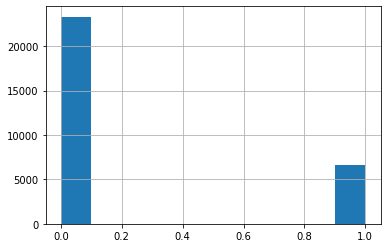

In [78]:
%matplotlib inline
df['default_next_month'].hist()

Text(0, 0.5, 'Frequency')

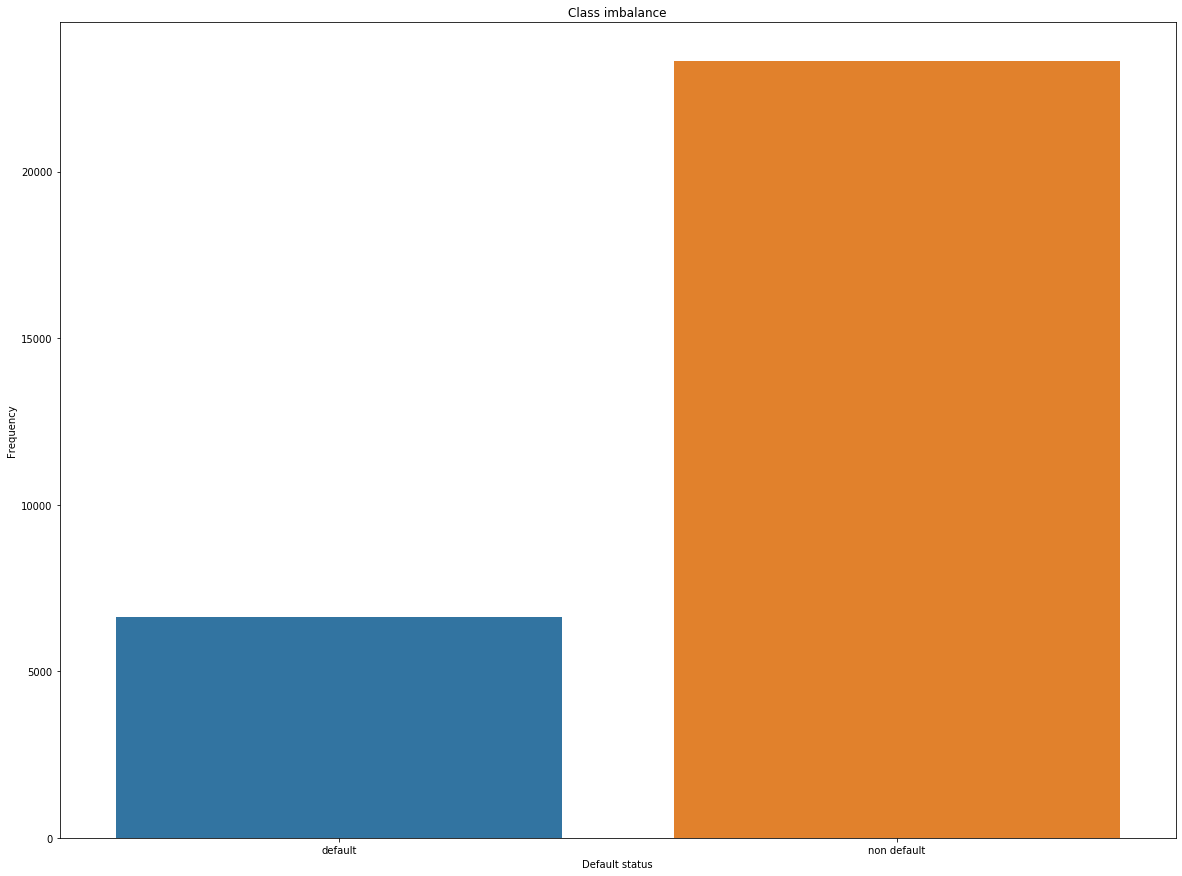

In [97]:
plt.figure(figsize=(20,15))
x = ['default', 'non default']
y = [len(df[df['default_next_month'] == 1]), len(df[df['default_next_month'] == 0])]

ax = sns.barplot(x, y).set_title('Class imbalance')

plt.xlabel('Default status')
# # Set y-axis label
plt.ylabel('Frequency')

In [76]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5851
           1       0.65      0.27      0.38      1636

    accuracy                           0.81      7487
   macro avg       0.74      0.61      0.63      7487
weighted avg       0.79      0.81      0.78      7487

